Srilasya Garigipaty

DATA 1202 

In-Class web scraping activity


Student # 100822953




In [1]:
#Load Libraries

import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen

In [2]:
#In the below cell code, you would find nested if-else conditions for author names,
#which are to extract the author/publication names.

no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls


In [3]:
#The below code cell will perform the following functions: • Call the get_data function inside a for loop,
#The for loop will iterate over this function starting from 1 till the number of pages+1. 
#Since the output will be a nested list, 
#you would first flatten the list and then pass it to the DataFrame. • Finally, save the dataframe as a CSV file.

results = [] 
for i in range(1, no_pages+1): 
    results.append(get_data(i)) 
flatten = lambda l: [item for sublist in l for item in sublist] 
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price']) 
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [4]:
#Reading CSV File
df = pd.read_csv("amazon_products.csv")

In [5]:
#Number of rows and columns in data frame
df.shape

(100, 5)

In [6]:
#print the first 75 rows of the dataset.
df.head(75)

,Book Name,Author,Rating,Customers_Rated,Price
0,The Psychology of Money,Morgan Housel,4.5 out of 5 stars,"6,615",₹ 290.00
1,Ikigai: The Japanese secret to a long and happ...,Héctor García,4.6 out of 5 stars,"10,904",₹ 300.00
2,World’s Greatest Books For Personal Growth & W...,Dale Carnegie,4.5 out of 5 stars,"4,096",₹ 299.00
3,Grandma's Bag of Stories: Collection of 20+ Il...,Sudha Murty,4.6 out of 5 stars,"3,931",₹ 191.00
4,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5 out of 5 stars,"18,052",₹ 449.00
...,...,...,...,...,...
70,Refreshing Mandala - Colouring Book for Adults...,Dreamland Publications,4.6 out of 5 stars,"2,677",₹ 175.00
71,Mathematics for Class 8 (Examination 2021-22),R.D. Sharma,4.6 out of 5 stars,"1,301",₹ 378.00
72,World's Greatest Leaders: Biographies of Inspi...,Wonder House Books,4.3 out of 5 stars,343,₹ 99.00
73,10 Last Years Solved Papers: CBSE Class 10 for...,Oswal Publishers,4.4 out of 5 stars,489,₹ 400.00


In [7]:
#data types of the DataFrame
df.dtypes

Book Name          object
Author             object
Rating             object
Customers_Rated    object
Price              object
dtype: object

In [8]:
#preprocessing on the ratings, customers_rated, and price column

df['Rating'] = df['Rating'].apply(lambda x: x.split()[0]) 
df['Rating'] = pd.to_numeric(df['Rating']) 
df["Price"] = df["Price"].str.replace('₹', '') 
df["Price"] = df["Price"].str.replace(',', '') 
df['Price'] = df['Price'].apply(lambda x: x.split('.')[0]) 
df['Price'] = df['Price'].astype(int) 
df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '') 
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore') 
df.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,The Psychology of Money,Morgan Housel,4.5,6615,290
1,Ikigai: The Japanese secret to a long and happ...,Héctor García,4.6,10904,300
2,World’s Greatest Books For Personal Growth & W...,Dale Carnegie,4.5,4096,299
3,Grandma's Bag of Stories: Collection of 20+ Il...,Sudha Murty,4.6,3931,191
4,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,18052,449


In [9]:
#Information about dataframe
df.describe

<bound method NDFrame.describe of                                             Book Name              Author  \
0                             The Psychology of Money       Morgan Housel   
1   Ikigai: The Japanese secret to a long and happ...       Héctor García   
2   World’s Greatest Books For Personal Growth & W...       Dale Carnegie   
3   Grandma's Bag of Stories: Collection of 20+ Il...         Sudha Murty   
4   My First Library: Boxset of 10 Board Books for...  Wonder House Books   
..                                                ...                 ...   
95  The Theory of Everything: The Origin and Fate ...     Stephen Hawking   
96                         Who Will Cry When You Die?        Robin Sharma   
97  The Silent Patient: The record-breaking, multi...    Alex Michaelides   
98  Computer Science with Python Textbook and Prac...        Sumita Arora   
99  Mahatma Gandhi Autobiography: The Story Of My ...      Mahatma Gandhi   

    Rating  Customers_Rated  Price  
0   

In [10]:
#verify the data types of the DataFrame.
df.dtypes

Book Name           object
Author              object
Rating             float64
Customers_Rated      int64
Price                int32
dtype: object

In [11]:
#Replace the zero values in the DataFrame to NaN.
df.replace(str(0), np.nan, inplace=True)


In [12]:
df.replace(0, np.nan, inplace=True)

In [13]:
# Counting the number of Null values in the dataframe
count_nan = len(df) - df.count()
count_nan


Book Name          0
Author             1
Rating             0
Customers_Rated    1
Price              0
dtype: int64

In [14]:
#dropping the null values
df=df.dropna()

In [15]:
#Checking that all null values are drpped
count_nan = len(df) - df.count()
count_nan

Book Name          0
Author             0
Rating             0
Customers_Rated    0
Price              0
dtype: int64

In [16]:
#Authors Highest Priced Book Sorted
data = df.sort_values(["Price"], axis=0, ascending=False)[:15] 
data

,Book Name,Author,Rating,Customers_Rated,Price
92,Essentials of Medical Pharmacology,K. D. Tripathi,4.6,1199.0,1395
57,Combo Pack: Lakhmir Singh Class 10 Science (Bi...,Manjit Kaur Lakhmir Singh,4.4,352.0,1180
83,New Simplified Physics : A Reference Book for ...,S.L. Arora,4.3,1193.0,1050
89,My First Complete Learning Library: Boxset of ...,Wonder House Books,4.6,3338.0,799
15,Atomic Habits: The life-changing million copy ...,James Clear,4.6,15817.0,600
98,Computer Science with Python Textbook and Prac...,Sumita Arora,4.5,450.0,595
7,Indian Polity - For Civil Services and Other S...,M. Laxmikanth,4.6,6462.0,595
28,Objective NCERT at your FINGERTIPS for NEET-AI...,MTG Editorial Board,4.7,830.0,550
85,How to Prepare for Quantitative Aptitude for t...,Arun Sharma,4.5,2111.0,545
9,Mathematics for Class 10 by R D Sharma (Examin...,R.D. Sharma,4.5,902.0,545


In [17]:
#Loading Bokeh JS library 

from bokeh.models import ColumnDataSource 
from bokeh.transform import dodge 
import math
from bokeh.io import curdoc 
curdoc().clear() 
from bokeh.io import push_notebook, show, output_notebook 
from bokeh.layouts import row 
from bokeh.plotting import figure 
from bokeh.transform import factor_cmap 
from bokeh.models import Legend 
output_notebook()

Loading BokehJS ...

In [18]:
data.head(2)

,Book Name,Author,Rating,Customers_Rated,Price
92,Essentials of Medical Pharmacology,K. D. Tripathi,4.6,1199.0,1395
57,Combo Pack: Lakhmir Singh Class 10 Science (Bi...,Manjit Kaur Lakhmir Singh,4.4,352.0,1180


In [21]:
data.columns

Index(['Book Name', 'Author', 'Rating', 'Customers_Rated', 'Price'], dtype='object')

In [22]:
data.rename(columns={1 : 'Book_Name'}, inplace=True)

In [23]:
data.head(2)

,Book Name,Author,Rating,Customers_Rated,Price
92,Essentials of Medical Pharmacology,K. D. Tripathi,4.6,1199.0,1395
57,Combo Pack: Lakhmir Singh Class 10 Science (Bi...,Manjit Kaur Lakhmir Singh,4.4,352.0,1180


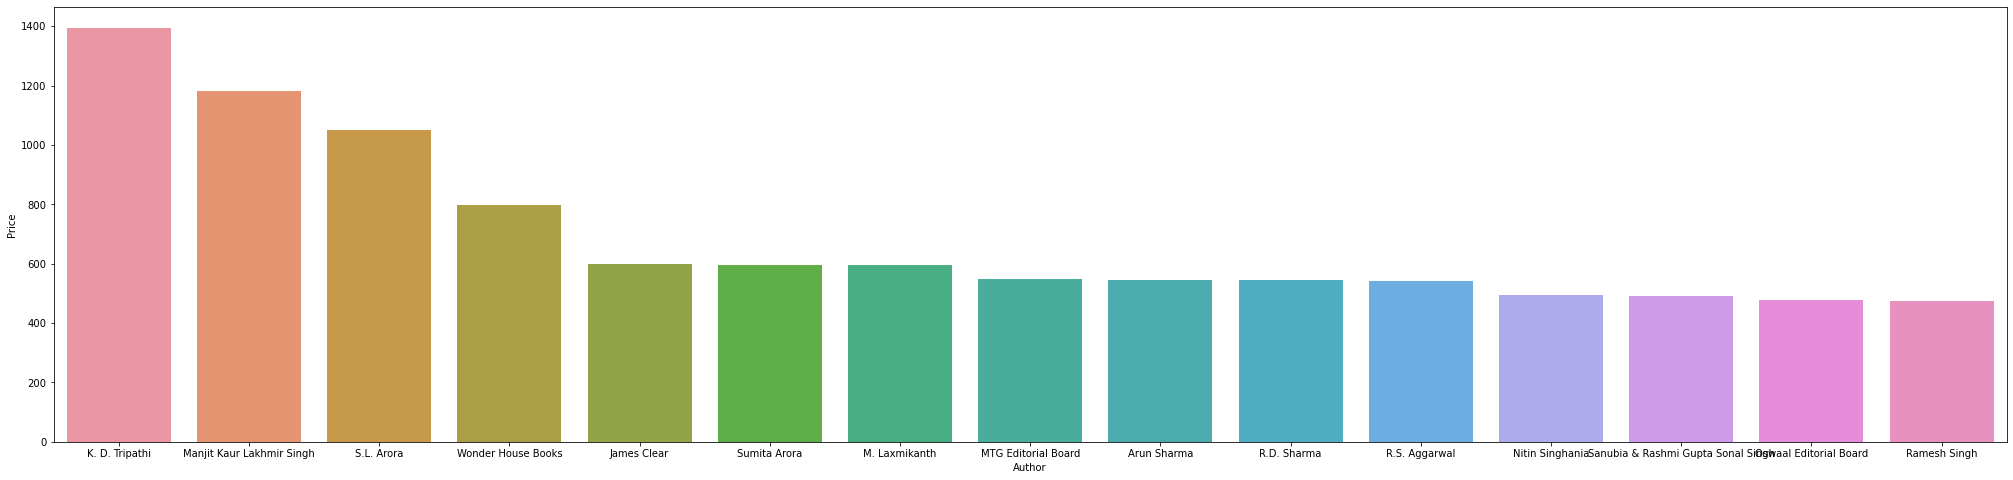

In [24]:
#Authors Highest Priced Book Plot 
plt.figure(figsize=(35,8))
sns.barplot(x = 'Author', y = 'Price',
           data = data)

In [25]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [26]:
df

,Book Name,Author,Rating,Customers_Rated,Price
0,The Psychology of Money,Morgan Housel,4.5,6615.0,290
1,Ikigai: The Japanese secret to a long and happ...,Héctor García,4.6,10904.0,300
2,World’s Greatest Books For Personal Growth & W...,Dale Carnegie,4.5,4096.0,299
3,Grandma's Bag of Stories: Collection of 20+ Il...,Sudha Murty,4.6,3931.0,191
4,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,18052.0,449
...,...,...,...,...,...
95,The Theory of Everything: The Origin and Fate ...,Stephen Hawking,4.6,4498.0,169
96,Who Will Cry When You Die?,Robin Sharma,4.5,7300.0,138
97,"The Silent Patient: The record-breaking, multi...",Alex Michaelides,4.5,62631.0,288
98,Computer Science with Python Textbook and Prac...,Sumita Arora,4.5,450.0,595


In [27]:
data = df[df['Customers_Rated'] > 1000] 
data = data.sort_values(['Rating'],axis=0, ascending=False)[:10] 
data

,Book Name,Author,Rating,Customers_Rated,Price
84,Diary of a Wimpy Kid: The Deep End (Book 15),Jeff Kinney,4.7,4690.0,379
16,Think Like a Monk: The secret of how to harnes...,Jay Shetty,4.7,10689.0,275
65,Death; An Inside Story: A book for all those w...,Sadhguru,4.7,3732.0,202
68,"The Magic of the Lost Temple: Illustrated, eas...",Sudha Murty,4.7,1880.0,199
20,Sapiens: A Brief History of Humankind,Yuval Noah Harari,4.7,30170.0,340
43,Harry Potter and the Philosopher's Stone,J.K. Rowling,4.7,24455.0,288
95,The Theory of Everything: The Origin and Fate ...,Stephen Hawking,4.6,4498.0,169
1,Ikigai: The Japanese secret to a long and happ...,Héctor García,4.6,10904.0,300
52,Indian Art and Culture for Civil Services and ...,Nitin Singhania,4.6,1904.0,493
31,Oxford Student Atlas for India - Third Edition,Oxford University Press,4.6,3928.0,210


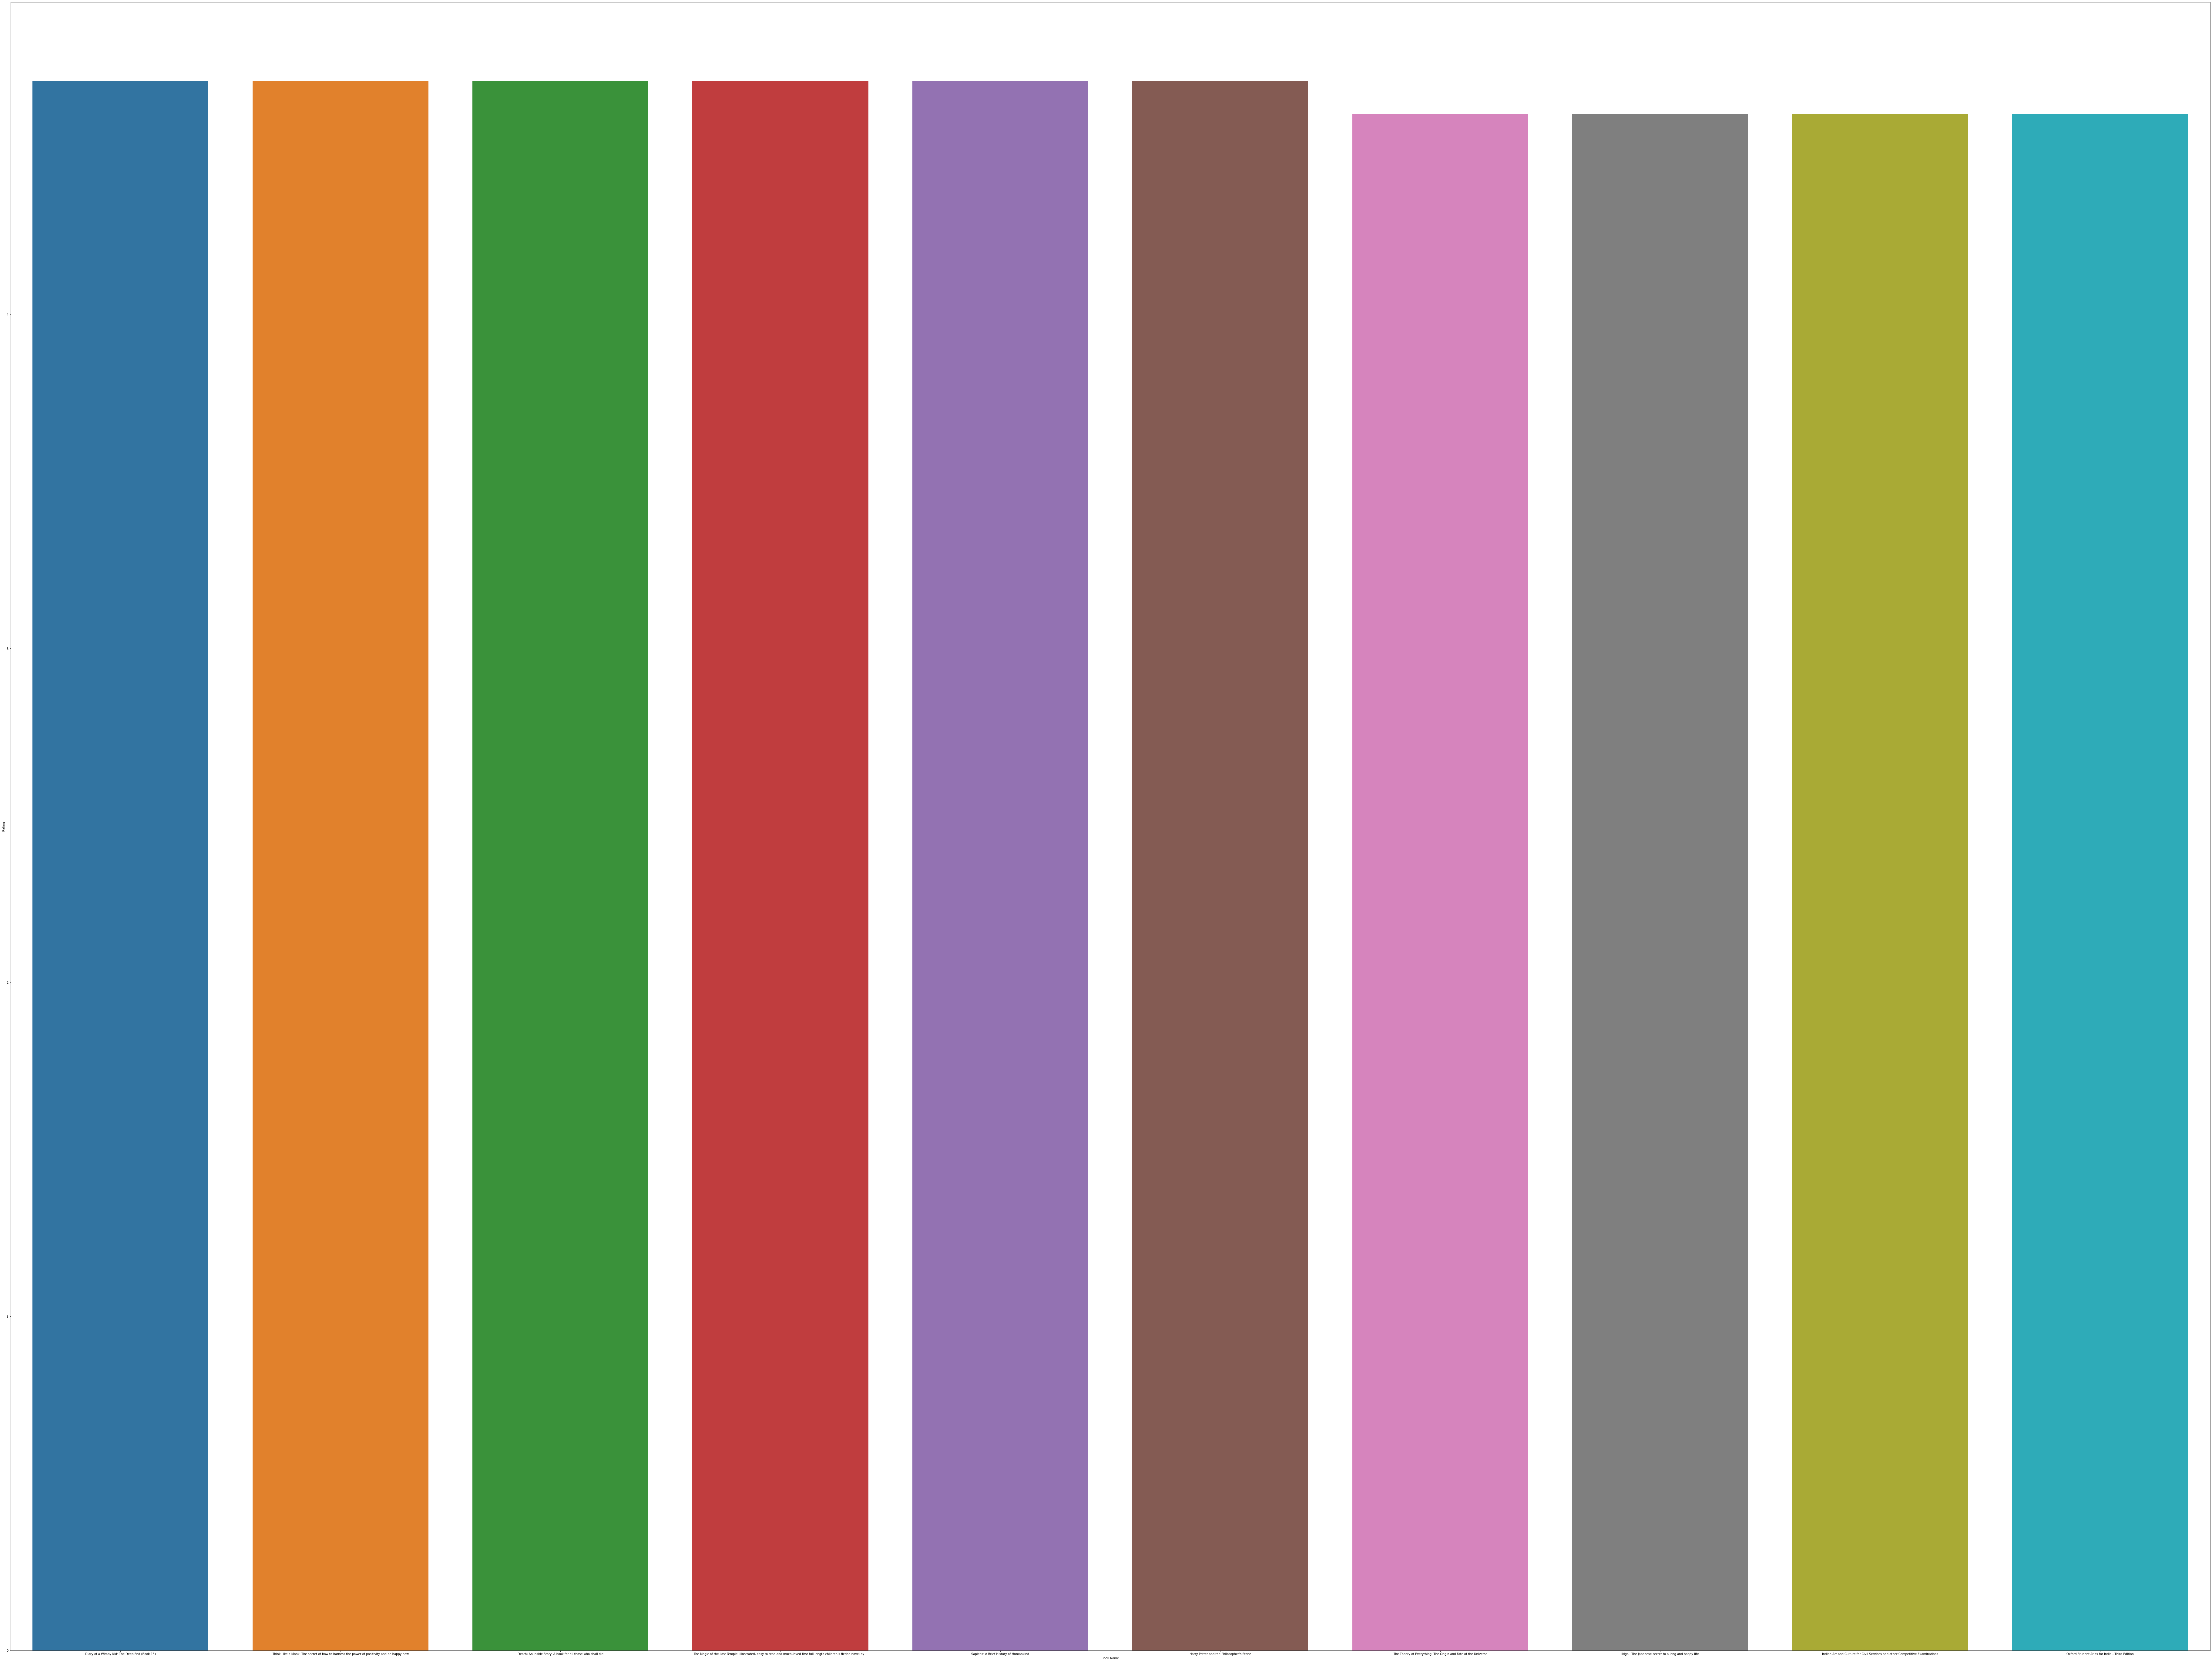

In [28]:
#Authors with highest priced book chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(130,100))
sns.barplot(x = 'Book Name', y = 'Rating',
           data = data)


In [29]:
#Top Rated books with more than 1000 Customer rating chart
p = figure(x_range=data.iloc[:,1], plot_width=800, plot_height=600, title="Top Rated Books with more than 1000 Customers Rating", toolbar_location=None, tools="")
p.vbar(x=data.iloc[:,1], top=data.iloc[:,2], width=0.9)
p.xgrid.grid_line_color = None 
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2
show(p)

In [30]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [31]:
#Uniquue authors in data dataframe
data.Author.unique()

array(['Jeff Kinney', 'Jay Shetty', 'Sadhguru', 'Sudha Murty',
       'Yuval Noah Harari', 'J.K. Rowling', 'Stephen Hawking',
       'Héctor García', 'Nitin Singhania', 'Oxford University Press'],
      dtype=object)

In [32]:
# Plotting the Top Authors vs Customers Rated  
from bokeh.transform import factor_cmap 
from bokeh.models import Legend 
from bokeh.palettes import Dark2_5 as palette 
import itertools 
from bokeh.palettes import d3 #colors has a list of colors which can be used in plots colors = itertools.cycle(palette)
palette = d3['Category20'][20]

index_cmap = factor_cmap('Author', palette=palette, factors=data["Author"])
p = figure(plot_width=700, plot_height=700, title = "Top Authors: Rating vs. Customers Rated")
p.scatter('Rating','Customers_Rated',source=data,fill_alpha=0.6, fill_color=index_cmap,size=20,legend='Author')
p.xaxis.axis_label = 'RATING'
p.yaxis.axis_label = 'CUSTOMERS RATED'
p.legend.location = 'top_left'
#BokehDeprecationWarning: 'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group'
#keywords instead
show(p)
